In [1]:
!git clone https://github.com/openai/point-e
%cd point-e
!pip install point -e .

Cloning into 'point-e'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 57 (delta 1), reused 1 (delta 1), pack-reused 50
Unpacking objects: 100% (57/57), 1.56 MiB | 7.97 MiB/s, done.
/kaggle/working/point-e
Obtaining file:///kaggle/working/point-e
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... - done
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-install-ljl8eoam/clip_c0910798411d49dbb09367e8cdc69bb4
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-install-ljl8eoam/clip_c0910798411d49dbb09367e8cdc69bb4
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import torch
from tqdm.auto import tqdm
import plotly.graph_objects as go

from point_e.models.download import load_checkpoint
from point_e.models.configs import MODEL_CONFIGS, model_from_config
from point_e.util.pc_to_mesh import marching_cubes_mesh
from point_e.util.plotting import plot_point_cloud
from point_e.util.point_cloud import PointCloud

In [3]:
class CFG:
    DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    BASE_NAME = 'sdf'
    GUIDANCE_SCALE = [3.0,0.0]


From https://www.kaggle.com/code/burhanuddinlatsaheb/text-to-3d-images-point-e


# Text2pointcloud

In [4]:
model = model_from_config(MODEL_CONFIGS[CFG.BASE_NAME], CFG.DEVICE)
model.eval()

model.load_state_dict(load_checkpoint(CFG.BASE_NAME, CFG.DEVICE))


  0%|          | 0.00/38.0M [00:00<?, ?iB/s]

<All keys matched successfully>

In [5]:


# Load a point cloud we want to convert into a mesh.
pc = PointCloud.load('/kaggle/input/ch07-pointe-text2pointcloud/point-e/greencar.npz')


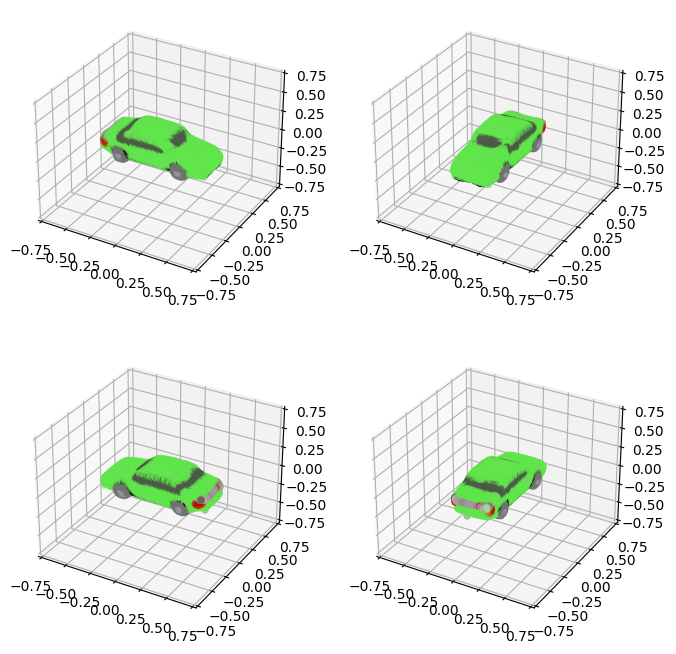

In [6]:
# Plot the point cloud as a sanity check.
fig = plot_point_cloud(pc, grid_size=2)

In [7]:


# Produce a mesh (with vertex colors)
mesh = marching_cubes_mesh(
    pc=pc,
    model=model,
    batch_size=4096,
    grid_size=32, # increase to 128 for resolution used in evals
    progress=True,
)



  0%|          | 0/8 [00:00<?, ?it/s]

In [8]:


# Write the mesh to a PLY file to import into some other program.
with open('greencar_mesh.ply', 'wb') as f:
    mesh.write_ply(f)

